In [23]:
## import libarary 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#import google cloud library
from google.cloud import storage, bigquery
from google.cloud import storage
# from google.cloud import aiplatform
# from support_functions import missing_value, fill_missing, list_dtypes

## sklearn module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from google.cloud import storage, bigquery


In [24]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "trial_bigq.json"

In [25]:
project_id = 'dtidsus'
dataset_id = 'capstone'
table_id = 'data_california_house'
region = 'us-central1'
bucket_name = 'modul4'
blob_name = 'vina/data_california_house.csv'

In [26]:
client = bigquery.Client(project='dtidsus')

In [27]:
try : 
    storage_client = storage.Client(project='dtidsus')
    bucket = storage_client.get_bucket(bucket_name) # Add bucket name
    data_capstone = bucket.blob('vina/data_california_house.csv')
    data_capstone.upload_from_filename('data_california_clean.csv')

    print ("Uploading model succeeded")
except:
    raise TypeError("An exception occurred")

Uploading model succeeded


In [28]:
client = bigquery.Client('dtidsus')

In [29]:
query_job = client.query(f"""select * from {dataset_id}.{table_id}""")

In [30]:
df = query_job.result().to_dataframe()

c:\Users\Vina\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [31]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-117.50,34.00,15.0,1929.0,317.0,1237.0,316.0,4.4063,INLAND,128500.0
1,-118.25,34.00,32.0,1218.0,342.0,1292.0,304.0,1.5781,<1H OCEAN,102900.0
2,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382,<1H OCEAN,105000.0
3,-118.25,34.00,34.0,1905.0,552.0,2194.0,521.0,1.4792,<1H OCEAN,95800.0
4,-118.25,34.00,41.0,1768.0,475.0,1721.0,474.0,1.3030,<1H OCEAN,90400.0
...,...,...,...,...,...,...,...,...,...,...
14443,-122.52,37.92,47.0,793.0,163.0,334.0,151.0,5.8509,NEAR BAY,317800.0
14444,-120.84,37.92,27.0,471.0,84.0,195.0,72.0,3.3333,INLAND,208300.0
14445,-122.19,39.92,20.0,2563.0,658.0,1363.0,611.0,1.0230,INLAND,54200.0
14446,-120.09,39.92,19.0,2335.0,518.0,1028.0,383.0,1.7267,INLAND,60700.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [33]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
ocean_df = df['ocean_proximity'].value_counts()

In [35]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-120.2, -123.8]"
1,latitude,float64,0,0.00,836,"[39.44, 38.03]"
2,housing_median_age,float64,0,0.00,52,"[4.0, 38.0]"
3,total_rooms,float64,0,0.00,5227,"[2460.0, 2574.0]"
4,total_bedrooms,float64,137,0.95,1748,"[967.0, 1005.0]"
5,population,float64,0,0.00,3498,"[1516.0, 2758.0]"
6,households,float64,0,0.00,1649,"[266.0, 152.0]"
7,median_income,float64,0,0.00,9797,"[7.2861, 3.662]"
8,ocean_proximity,object,0,0.00,5,"[INLAND, <1H OCEAN]"
9,median_house_value,float64,0,0.00,3548,"[36700.0, 357400.0]"


In [36]:
#check for duplicate
df.duplicated().sum()

np.int64(0)

In [37]:
#check for missing values
df.isnull().sum().sort_values(ascending=False)

total_bedrooms        137
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy set to 'median'
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the 'total_bedrooms' column
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

In [39]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [40]:
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [41]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [42]:
df = df.drop(['total_bedrooms', 'total_rooms', 'households', 'population'], axis=1)

In [43]:
from sklearn.cluster import KMeans

# Combine longitude and latitude into a single array
geo_features = df[['longitude', 'latitude']]

# Fit K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters
df['location_cluster'] = kmeans.fit_predict(geo_features)

df = df.drop(['latitude', 'longitude'], axis=1)

In [44]:
# Log transformation for highly skewed features
df['normalized_rooms_per_household'] = np.log1p(df['rooms_per_household'])  # Log transformation for normalization
df['normalized_population_per_household'] = np.log1p(df['population_per_household'])

# Square root transformation for moderately skewed feature
df['adjusted_median_income'] = np.sqrt(df['median_income'])


df = df.drop(['rooms_per_household', 'population_per_household', 'median_income'], axis=1)

print("Applied transformations with stakeholder-friendly names.")


Applied transformations with stakeholder-friendly names.


In [45]:
# Define cap thresholds (99th percentile)
cap_threshold_rooms = df['normalized_rooms_per_household'].quantile(0.99)
cap_threshold_population = df['normalized_population_per_household'].quantile(0.99)

# Cap the outliers
df['normalized_rooms_per_household'] = np.where(
    df['normalized_rooms_per_household'] > cap_threshold_rooms,
    cap_threshold_rooms,
    df['normalized_rooms_per_household']
)

df['normalized_population_per_household'] = np.where(
    df['normalized_population_per_household'] > cap_threshold_population,
    cap_threshold_population,
    df['normalized_population_per_household']
)

print("Capped outliers for normalized features.")



Capped outliers for normalized features.


In [46]:
# Apply capping to ensure values above 500,000 are capped
df['median_house_value'] = np.where(df['median_house_value'] > 500000, 500000, df['median_house_value'])

# Create a binary feature to flag capped house values
df['capped_value_flag'] = np.where(df['median_house_value'] == 500000, 1, 0)

print("Created a binary feature 'capped_value_flag' to flag capped house values.")



Created a binary feature 'capped_value_flag' to flag capped house values.


In [47]:
df['log_bedrooms_per_room'] = np.log1p(df['bedrooms_per_room'])

In [48]:
df.rename(columns={'log_bedrooms_per_room': 'bedroom_to_room_ratio_scaled'}, inplace=True)

df = df.drop(['bedrooms_per_room'], axis=1)

print("Renamed feature to 'bedroom_to_room_ratio_scaled' for better clarity.")

Renamed feature to 'bedroom_to_room_ratio_scaled' for better clarity.


In [49]:
# Merge ISLAND with NEAR OCEAN
df['ocean_proximity_NEAR OCEAN'] += df['ocean_proximity_ISLAND']
df = df.drop(['ocean_proximity_ISLAND'], axis=1)

print("Grouped ISLAND with NEAR OCEAN.")

Grouped ISLAND with NEAR OCEAN.


In [50]:
df['median_house_value'] = np.where(df['median_house_value'] > 500000, 500000, df['median_house_value'])


In [51]:
# Determining feature and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']



In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [53]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [54]:
# Model
model = XGBRegressor(
    random_state=42,
    subsample=0.8,
    reg_lambda=0.1,
    reg_alpha=1,
    n_estimators=1000,
    min_child_weight=3,
    max_depth=5,
    learning_rate=0.01,
    gamma=0.1,
    colsample_bytree=1.0
)
#Best Hyperparameters based on RandomizedSearchCV :  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [55]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100

In [56]:
# Evaluation
predictions = model.predict(X_test)

# Print evaluation metrics
print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)
print('MAPE: ', mape)

MSE:  2658278271.0256166
RMSE:  51558.49368460658
MAE:  35978.11429092777
R2:  0.802732894395783
MAPE:  21.21302492842707


In [57]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV # to find the best configuration

# Define hyperparameters for XGBoost
param_grid = {
    'n_estimators': [100, 200, 500, 1000],            # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],          # Step size shrinking
    'max_depth': [3, 5, 7, 10],                    # Maximum depth of trees
    'min_child_weight': [1, 3, 5],                      # Minimum sum of instance weight in a child
    'subsample': [0.6, 0.8, 1.0],                       # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],               # Fraction of features used for training each tree
    'gamma': [0, 0.1, 0.2, 0.3],                       # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.1, 1],                           # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 1]                           # L2 regularization term on weights
}

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Initialize RandomizedSearchCV for hyperparameter tuning
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


# Perform hyperparameter tuning
xgb_random.fit(X_train, y_train)

# Get the best model
best_model = xgb_random.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters: ", xgb_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}


In [58]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [59]:
y_pred_xgb = best_model.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / (y_test + 1e-10))) * 100

# Print evaluation metrics
print('MSE: ', mse_xgb)
print('RMSE: ', rmse_xgb)
print('MAE: ', mae_xgb)
print('R2: ', r2_xgb)
print('MAPE: ', mape_xgb)

MSE:  2628506155.364135
RMSE:  51268.95898459549
MAE:  35412.945807201555
R2:  0.8049422413811114
MAPE:  20.996929106996756


In [60]:
best_model.fit(X_train, y_train)


y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE: ", train_mse)
print("Train RMSE: ", train_rmse)
print("Train R²: ", train_r2)

print("\nTest MSE: ", test_mse)
print("Test RMSE: ", test_rmse)
print("Test R²: ", test_r2)


train_mape = np.mean(np.abs((y_train - y_train_pred) / (y_train + 1e-10))) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred) / (y_test + 1e-10))) * 100

print("\nTrain MAPE: ", train_mape)
print("Test MAPE: ", test_mape)


Train MSE:  1317416658.727809
Train RMSE:  36296.23477342807
Train R²:  0.9006926462232872

Test MSE:  2628506155.364135
Test RMSE:  51268.95898459549
Test R²:  0.8049422413811114

Train MAPE:  14.8729987026506
Test MAPE:  20.996929106996756


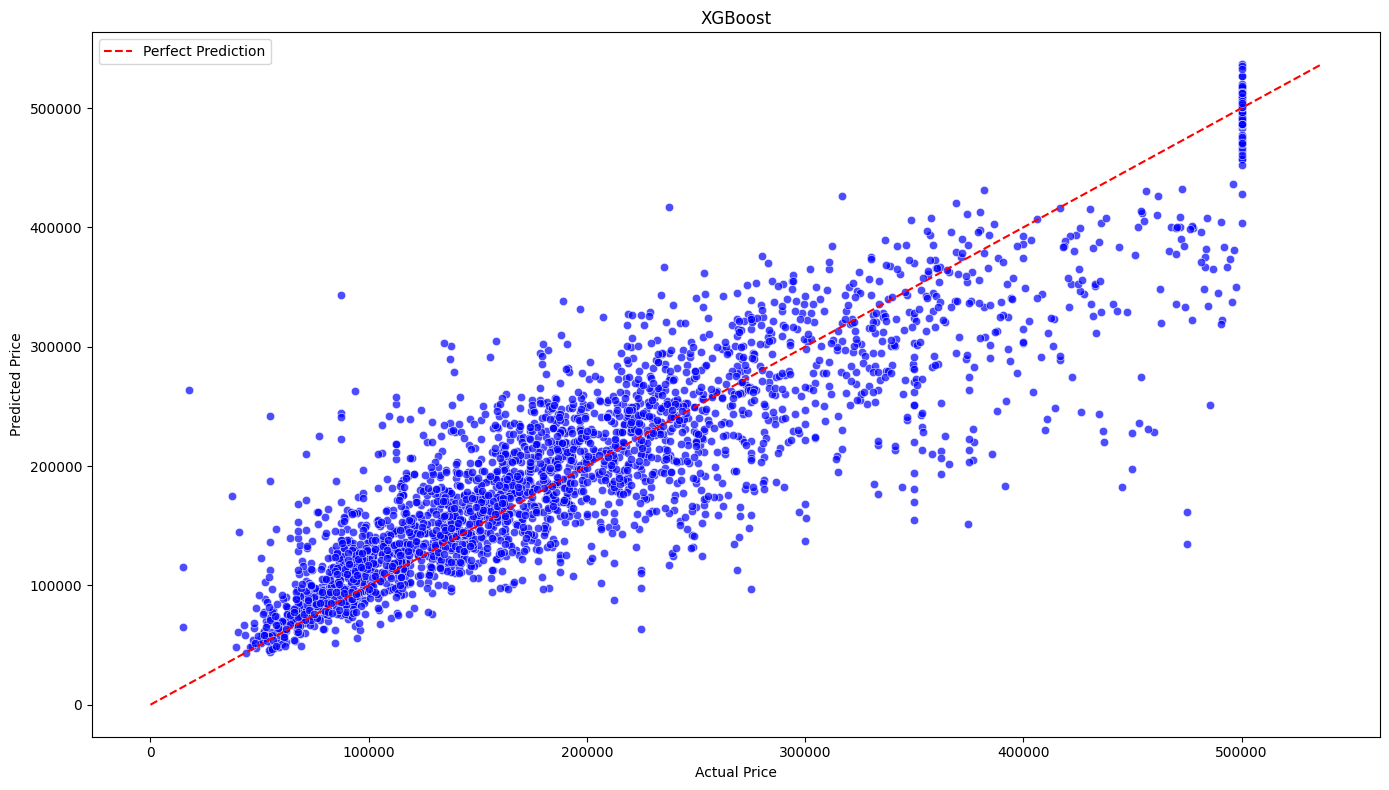

In [61]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7).set(
    title='XGBoost',
    xlabel='Actual Price',
    ylabel='Predicted Price'
)

# Add diagonal line for reference
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction')
plt.legend()

plt.tight_layout()
plt.show()


In [62]:
import pickle
# Save Model
model_filename = "model.pkl"
pickle.dump(model, open(model_filename, 'wb'))

##upload the model

In [63]:
try : 
    storage_client = storage.Client(project=project_id)
    bucket = storage_client.get_bucket(bucket_name) # Add bucket name
    blob_model = bucket.blob('vina/model/model.pkl')
    blob_model.upload_from_filename('model.pkl')

    print ("Uploading model succeeded")
except:
    raise TypeError("An exception occurred")

Uploading model succeeded


In [64]:
from google.cloud import aiplatform

In [65]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "trial_bigq.json"

In [66]:
aiplatform.init(project='dtidsus', location='us-central1')

model = aiplatform.Model.upload(
    display_name='vina_model_000',
    artifact_uri="gs://modul4/vina/model/",
    serving_container_image_uri="us-docker.pkg.dev/vertex-ai/prediction/sklearn-cpu.1-2:latest",
)

model.wait()

Creating Model
Create Model backing LRO: projects/41965541199/locations/us-central1/models/2195739014319833088/operations/6323391873574502400
Model created. Resource name: projects/41965541199/locations/us-central1/models/2195739014319833088@1
To use this Model in another session:
model = aiplatform.Model('projects/41965541199/locations/us-central1/models/2195739014319833088@1')


In [67]:
endpoint = aiplatform.Endpoint.create(
    display_name="vina-endpoint-000",
    project='dtidsus',
    location='us-central1',
)

Creating Endpoint
Create Endpoint backing LRO: projects/41965541199/locations/us-central1/endpoints/3807275614965071872/operations/7880792919714562048
Endpoint created. Resource name: projects/41965541199/locations/us-central1/endpoints/3807275614965071872
To use this Endpoint in another session:
endpoint = aiplatform.Endpoint('projects/41965541199/locations/us-central1/endpoints/3807275614965071872')


In [68]:
min_replica_count: int = 1
max_replica_count: int = 1

In [69]:
endpoint.deploy( 
    model=model,
    deployed_model_display_name='vina_model_000',
    machine_type='e2-standard-2',
    min_replica_count=min_replica_count,
    max_replica_count=max_replica_count,
    sync=True, 
)

Deploying Model projects/41965541199/locations/us-central1/models/2195739014319833088 to Endpoint : projects/41965541199/locations/us-central1/endpoints/3807275614965071872
Deploy Endpoint model backing LRO: projects/41965541199/locations/us-central1/endpoints/3807275614965071872/operations/2801576964970774528


FailedPrecondition: 400 Model server exited unexpectedly. Model server logs can be found at https://console.cloud.google.com/logs/viewer?project=41965541199&resource=aiplatform.googleapis.com%2FDeploymentResourcePool&advancedFilter=resource.type%3D%22aiplatform.googleapis.com%2FDeploymentResourcePool%22%0Aresource.labels.deployment_resource_pool_id%3D%22internal_3180486916923457536%22%0Aresource.labels.location%3D%22us-central1%22. 9: Model server exited unexpectedly. Model server logs can be found at https://console.cloud.google.com/logs/viewer?project=41965541199&resource=aiplatform.googleapis.com%2FDeploymentResourcePool&advancedFilter=resource.type%3D%22aiplatform.googleapis.com%2FDeploymentResourcePool%22%0Aresource.labels.deployment_resource_pool_id%3D%22internal_3180486916923457536%22%0Aresource.labels.location%3D%22us-central1%22.

#using endpoint

In [70]:
## predict your data with online prediction here 
PROJECT_ID = 'dtidsus'
ENDPOINT_ID = "projects/41965541199/locations/us-central1/endpoints/2241324766407426048"
REGION = 'us-central1'



In [71]:
aiplatform.init(project=PROJECT_ID, location=REGION)
endpoint = aiplatform.Endpoint(ENDPOINT_ID)
prediction = endpoint.predict(instances=[[50000, 1, 3, 1, 23, 131895, 132154, 129237]])

print("PREDICTION:", prediction)

PREDICTION: Prediction(predictions=[0.0], deployed_model_id='6724688981780332544', metadata=None, model_version_id='1', model_resource_name='projects/41965541199/locations/us-central1/models/4379281146152747008', explanations=None)


#manual file

In [256]:
try:
    storage_client = storage.Client(project=project_id)
    bucket = storage_client.get_bucket(bucket_name)
    blob_model = bucket.blob('vina/model/model.pkl')
    blob_model.download_to_filename('model.pkl')

    print ("download model succeeded")
except:
    raise TypeError("An exception occurred")

download model succeeded


In [257]:
model_load = pickle.load(open('model.pkl','rb'))

In [258]:
y_predict = model_load.predict(X_test)

In [259]:
y_predict

array([190774.56, 117276.74, 216952.31, ..., 295894.22, 372890.47,
       343491.06], dtype=float32)